In [2]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

C:\Users\rajpa\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Creating pandas dataframe of the aggregated data for each station 

In [20]:
data=pd.read_csv('2015_unique.csv')

In [21]:
data

,Station,Location,Day,Time,Count
0,Location 1: Regents Drive @ Route 1,Sidewalk,3,9,5
1,Location 1: Regents Drive @ Route 1,Sidewalk,3,10,12
2,Location 1: Regents Drive @ Route 1,Sidewalk,3,11,4
3,Location 1: Regents Drive @ Route 1,Sidewalk,3,12,20
4,Location 1: Regents Drive @ Route 1,Sidewalk,3,13,8
5,Location 1: Regents Drive @ Route 1,Sidewalk,3,15,3
6,Location 1: Regents Drive @ Route 1,Sidewalk,3,16,21
7,Location 1: Regents Drive @ Route 1,Sidewalk,3,17,11
8,Location 1: Regents Drive @ Route 1,Sidewalk,3,18,24
9,Location 1: Regents Drive @ Route 1,Sidewalk,4,8,2


Inserting dummy date for time series model(Here the actual date doesn't matter since we are using this only for timeseries training, again wherein this dates will be replaced by serial number)

In [22]:
data['Day']=data['Day'].replace(3,'2016-04-27')

In [23]:
data['Day']=data['Day'].replace(4,'2016-04-28')

In [24]:
data

,Station,Location,Day,Time,Count
0,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,9,5
1,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,10,12
2,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,11,4
3,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,12,20
4,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,13,8
5,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,15,3
6,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,16,21
7,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,17,11
8,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-27,18,24
9,Location 1: Regents Drive @ Route 1,Sidewalk,2016-04-28,8,2


Extracting data of particular station

In [25]:
data=data.loc[data['Station']=='Location 5: Campus Drive at Paint Branch Drive']

In [26]:
data1=data.groupby(['Station','Day','Time']).sum()

In [27]:
data1=data.groupby(['Station','Day','Time'],as_index=False)['Count'].sum()
station=len(data1)

In [28]:
data2=pd.DataFrame(data1)
list(data2)

['Station', 'Day', 'Time', 'Count']

In [29]:
data2

,Station,Day,Time,Count
0,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,8,18
1,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,9,29
2,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,10,33
3,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,11,17
4,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,12,33
5,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,13,42
6,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,14,8
7,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,16,48
8,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,17,41
9,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,18,17


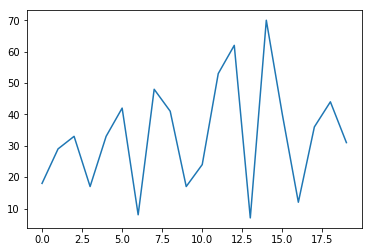

In [30]:
plt.plot(data2['Count'])
plt.show()

Interpolating NA values with spline interpolation

In [31]:
counter=0
time=11
max1=len(data2)
while counter<max1:
        x=data2.iloc[counter]
        i=time%11
        if x['Time']!=i+8:
            print('in if')
            time=time+1
            data2=data2.append({'Station':"Location 5: Campus Drive at Paint Branch Drive",'Day':"2016-04-"+str(((time-11)//11)+27),'Time':i+8},ignore_index=True)
        else:
            print('in else')
            counter=counter+1
            time=time+1

in else
in else
in else
in else
in else
in else
in else
in if
in else
in else
in else
in else
in else
in else
in else
in else
in else
in else
in if
in else
in else
in else


In [32]:
data2

,Station,Day,Time,Count
0,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,8,18.0
1,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,9,29.0
2,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,10,33.0
3,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,11,17.0
4,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,12,33.0
5,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,13,42.0
6,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,14,8.0
7,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,16,48.0
8,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,17,41.0
9,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,18,17.0


In [33]:
data2=data2.sort_values(by=['Day','Time'])

In [34]:
data2

,Station,Day,Time,Count
0,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,8,18.0
1,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,9,29.0
2,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,10,33.0
3,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,11,17.0
4,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,12,33.0
5,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,13,42.0
6,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,14,8.0
20,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,15,NaN
7,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,16,48.0
8,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,17,41.0


In [35]:
data2=data2.reset_index()

In [36]:
data2

,index,Station,Day,Time,Count
0,0,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,8,18.0
1,1,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,9,29.0
2,2,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,10,33.0
3,3,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,11,17.0
4,4,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,12,33.0
5,5,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,13,42.0
6,6,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,14,8.0
7,20,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,15,NaN
8,7,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,16,48.0
9,8,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,17,41.0


In [37]:
data2=data2.drop('index',axis=1)

In [38]:
data2=data2.interpolate(method='spline',order=2)

In [39]:
data2

,Station,Day,Time,Count
0,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,8,18.000000
1,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,9,29.000000
2,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,10,33.000000
3,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,11,17.000000
4,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,12,33.000000
5,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,13,42.000000
6,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,14,8.000000
7,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,15,21.466001
8,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,16,48.000000
9,Location 5: Campus Drive at Paint Branch Drive,2016-04-27,17,41.000000


updated time series plot

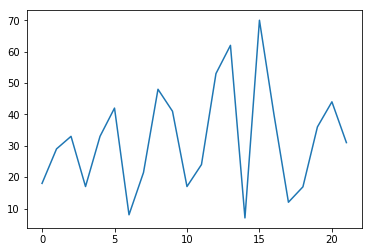

In [40]:
plt.plot(data2['Count'])
plt.show()

In [ ]:
PACF plot

In [41]:
counter=data2['Count']

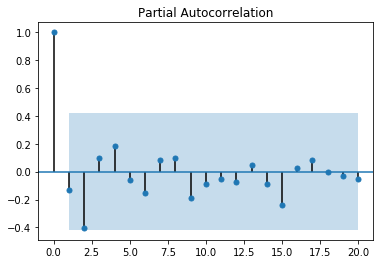

In [42]:
plot_pacf(counter,lags=20)

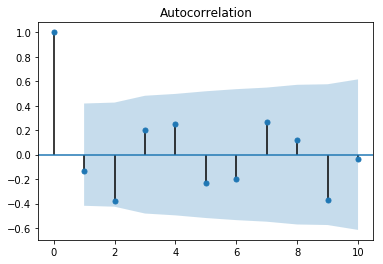

In [302]:
plot_acf(counter,lags=10)

In [44]:
data3=data2[['Time','Count']]

In [45]:
data3

,Time,Count
0,8,18.000000
1,9,29.000000
2,10,33.000000
3,11,17.000000
4,12,33.000000
5,13,42.000000
6,14,8.000000
7,15,21.466001
8,16,48.000000
9,17,41.000000


In [157]:
datax

[array([18.0, 29.0], dtype=object),
 array([29.0, 33.0], dtype=object),
 array([33.0, 17.0], dtype=object),
 array([17.0, 33.0], dtype=object),
 array([33.0, 42.0], dtype=object),
 array([42.0, 8.0], dtype=object),
 array([8.0, 21.46600076184093], dtype=object),
 array([21.46600076184093, 48.0], dtype=object),
 array([48.0, 41.0], dtype=object),
 array([41.0, 17.0], dtype=object),
 array([17.0, 24.0], dtype=object),
 array([24.0, 53.0], dtype=object),
 array([53.0, 62.0], dtype=object),
 array([62.0, 7.0], dtype=object),
 array([7.0, 70.0], dtype=object),
 array([70.0, 40.0], dtype=object),
 array([40.0, 12.0], dtype=object),
 array([12.0, 16.905881605625368], dtype=object),
 array([16.905881605625368, 36.0], dtype=object),
 array([36.0, 44.0], dtype=object)]

In [158]:
datay=[]
for i in range(2,len(data2)):
    datay.append(data2.values[i,3])

In [159]:
len(datay)

20

In [160]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [161]:
dataset=[(data2.values)[:,3]]
dataset=[[i] for i in dataset[0]]


scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


In [162]:
type(dataset)

numpy.ndarray

In [163]:
dataset

array([[0.17460317],
       [0.34920635],
       [0.41269841],
       [0.15873016],
       [0.41269841],
       [0.55555556],
       [0.01587302],
       [0.22961906],
       [0.65079365],
       [0.53968254],
       [0.15873016],
       [0.26984127],
       [0.73015873],
       [0.87301587],
       [0.        ],
       [1.        ],
       [0.52380952],
       [0.07936508],
       [0.15723622],
       [0.46031746],
       [0.58730159],
       [0.38095238]])

In [164]:
datax=[]

for i in range(2,len(data2)):
    datax.append(dataset[i-2:i])

In [165]:
datax

[array([[0.17460317],
        [0.34920635]]), array([[0.34920635],
        [0.41269841]]), array([[0.41269841],
        [0.15873016]]), array([[0.15873016],
        [0.41269841]]), array([[0.41269841],
        [0.55555556]]), array([[0.55555556],
        [0.01587302]]), array([[0.01587302],
        [0.22961906]]), array([[0.22961906],
        [0.65079365]]), array([[0.65079365],
        [0.53968254]]), array([[0.53968254],
        [0.15873016]]), array([[0.15873016],
        [0.26984127]]), array([[0.26984127],
        [0.73015873]]), array([[0.73015873],
        [0.87301587]]), array([[0.87301587],
        [0.        ]]), array([[0.],
        [1.]]), array([[1.        ],
        [0.52380952]]), array([[0.52380952],
        [0.07936508]]), array([[0.07936508],
        [0.15723622]]), array([[0.15723622],
        [0.46031746]]), array([[0.46031746],
        [0.58730159]])]

In [175]:
datay=[]

for i in range(2,len(data2)):
    datay.append(dataset[i])
datax=np.array(datax)
datay=np.array(datay)


In [172]:
datax = numpy.reshape(datax, (datax.shape[0], 1, datax.shape[1]))
datay = numpy.reshape(datay, (datay.shape[0], 1, datay.shape[1]))

In [177]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, 2)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(datax, datay, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 10s - loss: 0.2307
Epoch 2/100
 - 0s - loss: 0.2021
Epoch 3/100
 - 0s - loss: 0.1790
Epoch 4/100
 - 0s - loss: 0.1598
Epoch 5/100
 - 0s - loss: 0.1430
Epoch 6/100
 - 0s - loss: 0.1310
Epoch 7/100
 - 0s - loss: 0.1192
Epoch 8/100
 - 0s - loss: 0.1096
Epoch 9/100
 - 0s - loss: 0.1028
Epoch 10/100
 - 0s - loss: 0.0984
Epoch 11/100
 - 0s - loss: 0.0925
Epoch 12/100
 - 0s - loss: 0.0895
Epoch 13/100
 - 0s - loss: 0.0884
Epoch 14/100
 - 0s - loss: 0.0848
Epoch 15/100
 - 0s - loss: 0.0835
Epoch 16/100
 - 0s - loss: 0.0821
Epoch 17/100
 - 0s - loss: 0.0823
Epoch 18/100
 - 0s - loss: 0.0800
Epoch 19/100
 - 0s - loss: 0.0796
Epoch 20/100
 - 0s - loss: 0.0788
Epoch 21/100
 - 0s - loss: 0.0784
Epoch 22/100
 - 0s - loss: 0.0781
Epoch 23/100
 - 0s - loss: 0.0776
Epoch 24/100
 - 0s - loss: 0.0774
Epoch 25/100
 - 0s - loss: 0.0778
Epoch 26/100
 - 0s - loss: 0.0762
Epoch 27/100
 - 0s - loss: 0.0762
Epoch 28/100
 - 0s - loss: 0.0758
Epoch 29/100
 - 0s - loss: 0.0753
Epoch 30/100
 - 0s - l

In [ ]:
predict=model.predict(datax)
predict=scaler.inverse_transform(predict)